## Task 1

Here we have a classification problem, so we are going to use the following roadmap suggested by sklearn: \
![roadmap](./images/ml-map.png)

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
SEED = 7412

np.random.seed(SEED)
random.seed(SEED)


In [3]:
df = pd.read_csv("data_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  #! why does it work better with min-max scaler

X = df.drop(["diagnosis", "id"], axis=1) 
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Y = df["diagnosis"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Reminders



**Precision and recall:** \
![precision-and-recall](./images/precision-recall.png)

**F score:** \
$
{\displaystyle F_{\beta }=(1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{(\beta ^{2}\cdot \mathrm {precision} )+\mathrm {recall} }}}
$

**Support Vector Classification:** \
The goal is to find a hyperplane in N-dimensional space which divides the data points into two categories (N - is the number of features in the dataset, here we have 31 features).

![svc](./images/svc.png)

In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svc = LinearSVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_pred, Y_test, output_dict=True)
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       107
           M       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



The accuracy is $96\%$, which is not a bad result.
Now we can define the most important features for this classification: greater the coefficient greater the impact on the result.

In [7]:
importance = abs(svc.coef_[0])
feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
importance_df.head()

,Feature,Importance
10,radius_se,1.763138
7,concave points_mean,1.562774
20,radius_worst,1.256232
21,texture_worst,1.236568
9,fractal_dimension_mean,1.162231


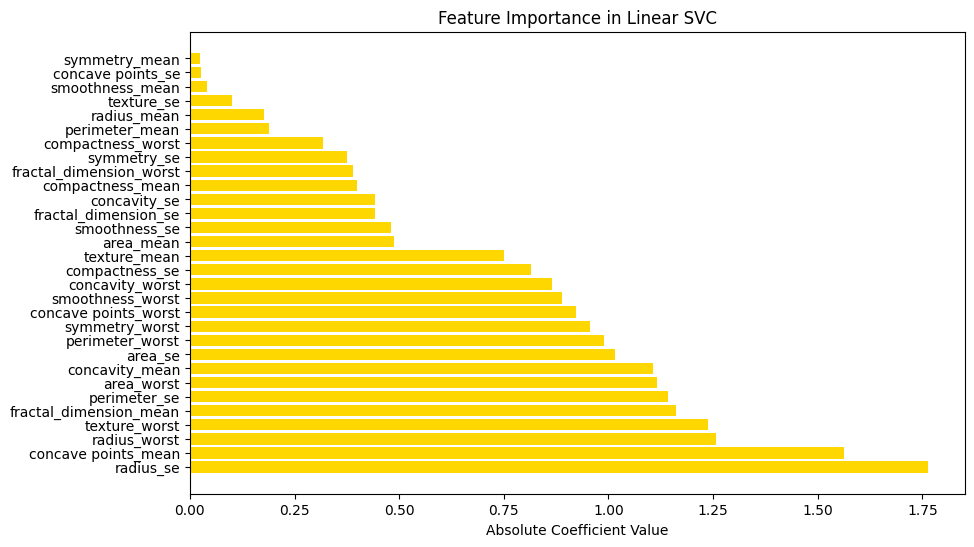

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="gold")
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance in Linear SVC")
plt.show()

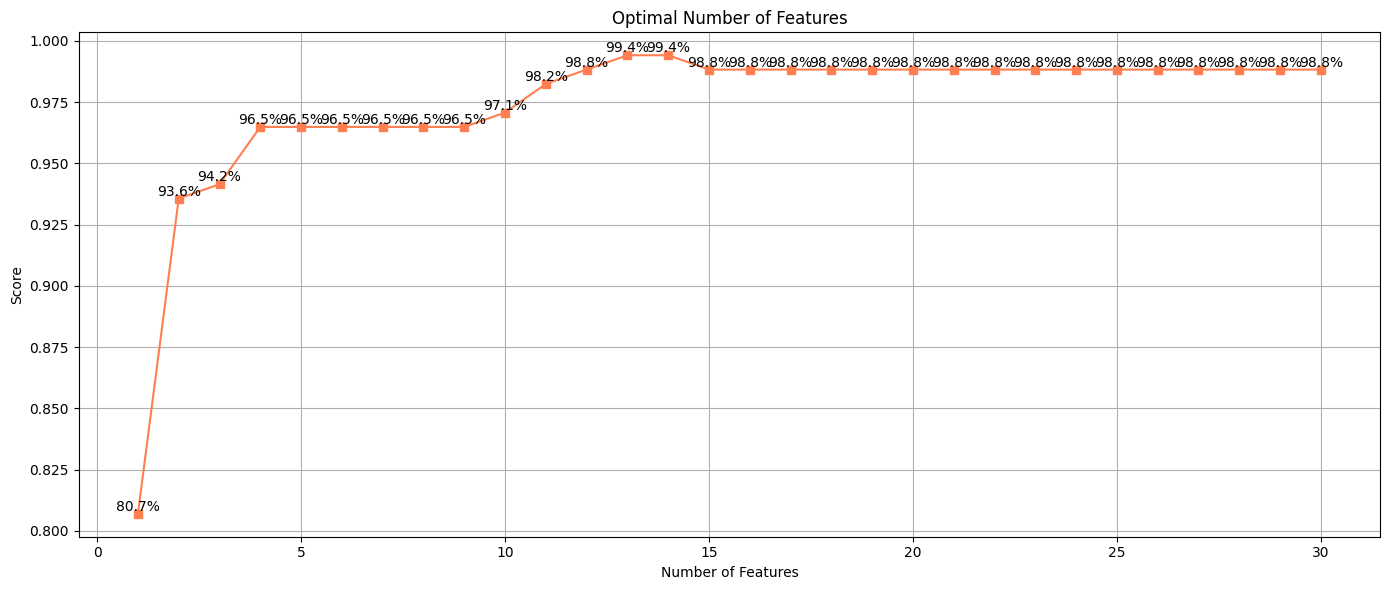

In [9]:
scores = []
for n in range(1, len(X.columns)+1):
    svc = LinearSVC()
    svc.fit(X_train[importance_df["Feature"][:n]], Y_train)
    scores.append(svc.score(X_test[importance_df["Feature"][:n]], Y_test))

plt.figure(figsize=(14, 6))
plt.plot(range(1, len(X.columns)+1), scores, marker="s", color="coral", label="accuracy")
plt.title("Optimal Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.grid()
plt.tight_layout()
for i, score in enumerate(scores):
    plt.text(i + 1, score, f"{score*100:.1f}%", ha='center', va='bottom')
plt.show()